
# Risk Managment, Sharpe Ratio, and Applications to Leveraging

**Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


### What is Diversification?

Portfolio diversification is the allocation of capital in diverse set of investments.

**Diversification** is a fundamental strategy in portfolio management that aims to reduce risk by spreading investments across a variety of assets. In this section, we will explore the concept of diversification through covariance matrices and introduce the **Sharpe Ratio** as a tool for assessing risk-adjusted returns in investment portfolios.

### Benefits of Diversification

Diversification offers several key benefits in risk management:

1. **Risk Reduction**: By holding a diversified portfolio, investors can reduce the impact of adverse price movements in individual assets. When some assets decline in value, others may rise, helping to balance out overall returns.

2. **Lower Volatility**: Diversification tends to result in a portfolio with lower volatility compared to individual assets. This can make the portfolio more stable and less prone to large price swings.

3. **Enhanced Risk-Return Tradeoff**: Diversification allows investors to potentially achieve a better risk-return tradeoff. It provides the opportunity to target a specific level of risk while still seeking attractive returns.

# Covariance Matrices

A covariance matrix is a fundamental tool in finance and portfolio management for quantifying the relationships and dependencies between the returns of different assets within a portfolio.

Covariance is a statistical measure that quantifies the degree to which two random variables, X and Y, vary together based on a dataset with m data points. It is used to assess the relationship between the variables and how they move in relation to each other.

The formula for computing the covariance between data sets $X=\{x_1,\ldots,x_t\}$ and $Y=\{y_1,\ldots,y_t\}$

$$
\text{Cov}(X, Y) = \frac{1}{t} \sum_{i=1}^{t} (x_i - \bar{x})(y_i - \bar{y})
$$

where $\bar{x}$ and $\bar{y}$ are the means of $X$ and $Y$ respectively.


A covariance matrix is a symmetric matrix that provides a systematic way to capture the covariances and correlations between the returns of multiple assets in a portfolio. Each element of the matrix represents the covariance between two specific data sets, e.g. log returns on different stock indexes, while the diagonal elements represent the variances of individual data sets.

Here's the general structure of a covariance matrix of a collection of data sets $A_1,A_2,\ldots,A_n$:


$$
\begin{bmatrix}
  \text{Var}(A_1) & \text{Cov}(A_1, A_2) & \text{Cov}(A_1, A_3) & \ldots & \text{Cov}(A_1, A_n) \\
  \text{Cov}(A_2, A_1) & \text{Var}(A_2) & \text{Cov}(A_2, A_3) & \ldots & \text{Cov}(A_2, A_n) \\
  \text{Cov}(A_3, A_1) & \text{Cov}(A_3, A_2) & \text{Var}(A_3) & \ldots & \text{Cov}(A_3, A_n) \\
  \ldots & \ldots & \ldots & \ldots & \ldots \\
  \text{Cov}(A_n, A_1) & \text{Cov}(A_n, A_2) & \text{Cov}(A_n, A_3) & \ldots & \text{Var}(A_n) \\
\end{bmatrix}
$$

In [1]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import random
import datetime as dt
sns.set_style('darkgrid')

In [2]:
# List of stock symbols 
stock_symbols = ['INTC', 'MSFT', 'GOOGL','AMZN','TSLA','NVDA']

# Define the start and end dates for a five-year period
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365) 

# Download stock data for each symbol
stock_data = yf.download(stock_symbols, start=start_date, end=end_date)

# Calculate log returns for each stock symbol and add them to the DataFrame
log_returns = pd.DataFrame()
for symbol in stock_symbols:
    log_returns[symbol] = np.log(stock_data['Close'][symbol]/stock_data['Close'][symbol].shift(1))

log_returns = log_returns.dropna()

returns = (np.exp(log_returns)-1)

[*********************100%***********************]  6 of 6 completed


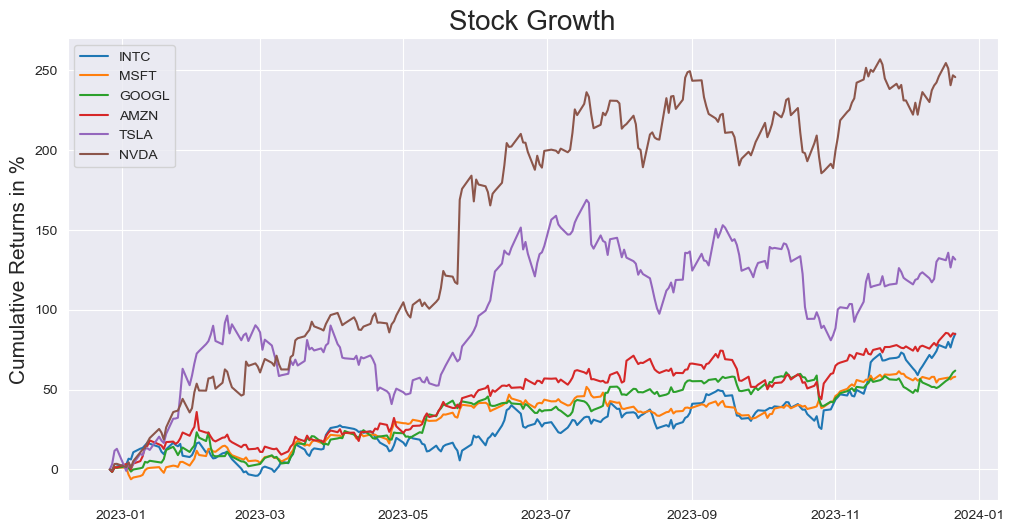

In [3]:
plt.figure(figsize=(12, 6))

for stock_symbol in stock_symbols:
    plt.plot(stock_data.index, ((stock_data['Close'][stock_symbol]/stock_data['Close'][stock_symbol][0])-1)*100, label=stock_symbol)
plt.legend()
plt.title('Stock Growth', fontsize = 20)
plt.ylabel('Cumulative Returns in %', fontsize = 15)
plt.show()

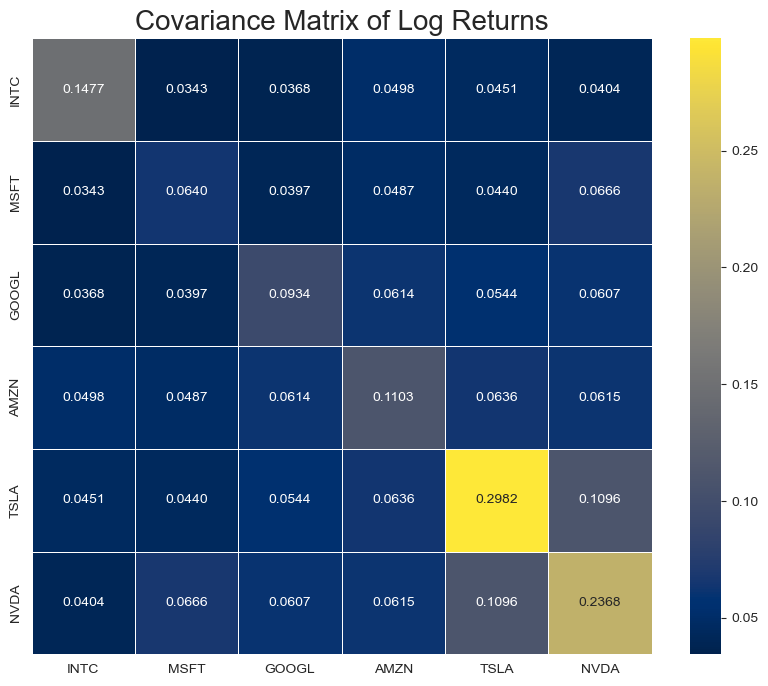

In [4]:
# Calculate the covariance matrix
covariance_matrix = 252*((returns).cov())

# Create a heatmap to visualize the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt='.4f', linewidths=.5)
plt.title('Covariance Matrix of Log Returns', fontsize=20)
plt.show()


### The Sharpe Ratio

The Sharpe Ratio is a widely used measure for assessing the risk-adjusted returns of an investment portfolio. It helps investors evaluate whether the return they receive for taking on risk is adequate. The formula for the Sharpe Ratio is as follows:

$$
\mbox{Sharpe Ratio} = \frac{\mbox{Average Return or Adjusted Average Return}}{\mbox{Portfolio Volatility}}
$$

Where:
- A portfolio's return, often times adjusted with respect to the return rate of capital when invested in a low risk investment such as a treasury bond or money market investment. Other times returns are adjusted to the investment of capital in an index fund.

<br>

- Portfolio Volatility is the standard deviation of the (log) returns.

<br>

A higher Sharpe Ratio indicates a better risk-adjusted performance, as it means the portfolio is generating more return for each unit of risk taken.

In [12]:
#Find Sharpe Ratios of the stocks in stock_symbols over the historical period

# Risk free rate of 5% annual
risk_free_rate = 0.05   

# Initialize a dictionary to store Sharpe ratios
sharpe_ratios = {}

# Calculate and print the Sharpe ratio for each individual stock
for stock_symbol in stock_symbols:
    excess_returns = (returns[stock_symbol] - (risk_free_rate/252)) #Divide 252 to adjust for daily interest
    mean_excess_return = excess_returns.mean()*252
    std_dev_excess_return = excess_returns.std()*np.sqrt(252)
    sharpe_ratio = mean_excess_return / std_dev_excess_return
    sharpe_ratios[stock_symbol] = sharpe_ratio

# Print Sharpe ratios for each stock
for stock_symbol in stock_symbols:
    print(f"{stock_symbol}: Sharpe Ratio = {sharpe_ratios[stock_symbol]:.4f}")
    print(f"{stock_symbol}: Volatility = {np.sqrt(covariance_matrix[stock_symbol][stock_symbol])}")
    print('---------')

INTC: Sharpe Ratio = 1.6829
INTC: Volatility = 0.38434605083339834
---------
MSFT: Sharpe Ratio = 1.7609
MSFT: Volatility = 0.2530333538849608
---------
GOOGL: Sharpe Ratio = 1.5865
GOOGL: Volatility = 0.30553952253557864
---------
AMZN: Sharpe Ratio = 1.8871
AMZN: Volatility = 0.3321202845859591
---------
TSLA: Sharpe Ratio = 1.7381
TSLA: Volatility = 0.5460446477541778
---------
NVDA: Sharpe Ratio = 2.7153
NVDA: Volatility = 0.48665818665161326
---------


In [13]:
#Find a set of weights, equivalently portfolio investment percentages in stock_symbols, 
#which minimizes a historical portfolio's volatility subject to the following investment constraints
#1) Must invest at least 7.5% of capital into each index
#2) Cannot invest more than 35% of capital into a single index

#Create dictionary average/expected daily return for indexes in stock_symbols normalized for yearly return
expected_returns = {stock: 252*np.mean(returns[stock]) for stock in stock_symbols}


# Number of assets
n_assets = len(stock_symbols)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 5% of capital into each index in stock_symbols
#Do not allocate more than 35% of capital into each index in stock_symbol
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
              {'type': 'ineq', 'fun': lambda weights: min(weights)-.075},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result = minimize(portfolio_volatility, initial_weights, method='SLSQP', constraints=constraints)

# Optimal asset weights
optimal_weights = result.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for stock, weight in zip(stock_symbols, optimal_weights):
    print(f"{stock}: Weight = {weight:.4f}")


Optimal Asset Weights to minimize volatility:
INTC: Weight = 0.1740
MSFT: Weight = 0.3500
GOOGL: Weight = 0.2510
AMZN: Weight = 0.0750
TSLA: Weight = 0.0750
NVDA: Weight = 0.0750


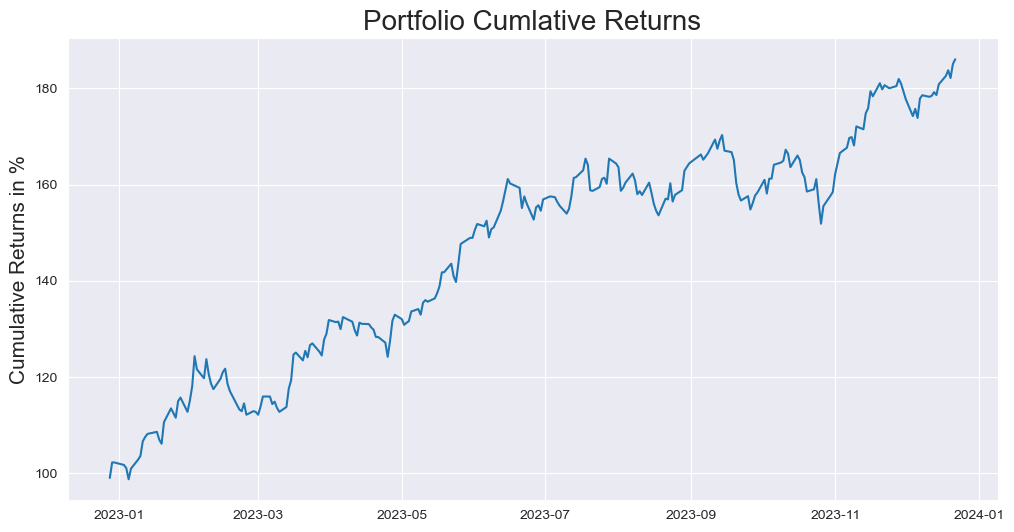

In [14]:
#Create a Portfolio using the optimal weights found to minimimize volatility subject to the investment constraints
#Create a visual of the portfolio's cumulative profits over the historical period


# Create a list to store individual asset returns
asset_returns_array = np.array([returns[stock] for stock in stock_symbols])


# Transpose the optimal_weights to match dimensions
optimal_weights_transposed = optimal_weights[:, np.newaxis]

# Calculate the portfolio returns by taking a weighted sum of asset returns
portfolio_returns = np.sum(asset_returns_array * optimal_weights_transposed, axis=0)


#Create visual of portfolio cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12,6))

plt.plot(returns.index, cumulative_returns*100, returns)
plt.title('Portfolio Cumlative Returns', size=20)
plt.ylabel('Cumulative Returns in %', fontsize = 15)

plt.show()


In [15]:
#Find Volatility and Shapre ratio of portfolio

# Calculate the portfolio standard deviation with optimal weights
portfolio_std_dev = portfolio_returns.std()*np.sqrt(252)

# Calculate the Sharpe ratio with annual risk-free rate of 5%
risk_free_rate = 0.05   

portfolio_sharpe_ratio = (np.mean(portfolio_returns)*252 - risk_free_rate) / portfolio_std_dev

# Print the Sharpe ratio
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")

print('---------')

print(f"Portfolio Volatility: {portfolio_std_dev}")

print('-------')

print(f"Portfolio Return: {100*cumulative_returns[-1]:.4f}%")

Portfolio Sharpe Ratio: 2.5410
---------
Portfolio Volatility: 0.23906657404246048
-------
Portfolio Return: 186.0285%


### Adjusting Portfolio Volatility with Leverage

Leverage is a powerful tool that can be utilized to control a portfolio's volatility to a predetermined allowed amount. The lower the volatility the more leverage that can be applied, increasing profits and losses, while maintaining a predetermined volatility and/or Value at Risk within a portfolio.

In [16]:
#Find leverage ratio to allow portfolio volatility be .4
leverage_factor_vol = .4/portfolio_std_dev

print(f"Leveraging by {leverage_factor_vol} creates a hisorical portfolio with a volotility of .4.")  

Leveraging by 1.673174100570648 creates a hisorical portfolio with a volotility of .4.


In [17]:
#Find portfolio Value at Risk at the 95% confidence interval

# Sort the portfolio returns in ascending order
sorted_returns = np.sort(portfolio_returns)

# Determine the number of data points
N = len(sorted_returns)

# Calculate the index corresponding to the 5th percentile (95% confidence level)
percentile_index = int(0.05 * N)

# Find the return value at the 5th percentile
var_95 = sorted_returns[percentile_index]

# You can express VaR as a percentage by multiplying it by 100
var_95_percent = var_95 * 100

print(f"Value at Risk (VaR) at the 95% confidence level: {var_95_percent:.2f}%")


Value at Risk (VaR) at the 95% confidence level: -2.29%


In [18]:
# Find leverage factor allowing for a portfolio to have a 4.6% Value at Risk at the 95% confidence interval.

leverage_factor_VaR = 4.6/-var_95_percent

print(f"Leveraging by {leverage_factor_VaR} creates a hisorical portfolio with a Value at Risk of 4.6% at the 95% confidence interval.")  

Leveraging by 2.0084277645531086 creates a hisorical portfolio with a Value at Risk of 4.6% at the 95% confidence interval.


In [19]:
#Find the Sharpe Ratios of the historical portfolios with the new two leveraging factors.


# Volatility leveraging
portfolio_vol_leverage = portfolio_returns*leverage_factor_vol

portfolio_vol_leverage_volatility = portfolio_vol_leverage.std()*np.sqrt(252)

risk_free_rate = 0.05 

portfolio_vol_sharpe = (np.mean(portfolio_vol_leverage)*252-risk_free_rate)/portfolio_vol_leverage_volatility


#Value at Risk Leveraging
portfolio_VaR_leverage = portfolio_returns*leverage_factor_VaR

portfolio_VaR_leverage_volatility = portfolio_VaR_leverage.std()*np.sqrt(252)

portfolio_VaR_sharpe = (np.mean(portfolio_VaR_leverage)*252-risk_free_rate)/portfolio_VaR_leverage_volatility

print(f'The historical sharpe ratio of leveraging portfolio by {leverage_factor_vol} is {portfolio_vol_sharpe}.')

print('-----------')

print(f'The historical sharpe ratio of leveraging portfolio by {leverage_factor_VaR} is {portfolio_VaR_sharpe}.')

print('-----------')

print(f'The historical sharpe ratio of portfolio without leveraging is {portfolio_sharpe_ratio}.')

The historical sharpe ratio of leveraging portfolio by 1.673174100570648 is 2.625105066234912.
-----------
The historical sharpe ratio of leveraging portfolio by 2.0084277645531086 is 2.6459704957701047.
-----------
The historical sharpe ratio of portfolio without leveraging is 2.5409583036635803.
